<a href="https://colab.research.google.com/github/sukmoonlee/JupyterNotebook/blob/main/2020/SKT_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler

## 주식정보 가져오기 (Pandas의 DataReader 이용하여 야후 주식정보 활용)

In [2]:
# SK / 034730
# SK텔레콤 / 017670
# SK이노베이션 / 096770
# KT / 030200
# LG U+ / 032640

start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()

skt_df = pdr.DataReader("017670.KS", "yahoo", start, end)
sk_df = pdr.DataReader("034730.KS", "yahoo", start, end)
skinno_df = pdr.DataReader("096770.KS", "yahoo", start, end)
kt_df = pdr.DataReader("030200.KS", "yahoo", start, end)
lgu_df = pdr.DataReader("032640.KS", "yahoo", start, end)

skt_df.shape, sk_df.shape, skinno_df.shape, kt_df.shape, lgu_df.shape

In [3]:
# 불필요한 정보 제거
del skt_df['Volume'], skt_df['Adj Close'], skt_df['High'], skt_df['Low']
del sk_df['Volume'], sk_df['Adj Close'], sk_df['High'], sk_df['Low']
del skinno_df['Volume'], skinno_df['Adj Close'], skinno_df['High'], skinno_df['Low']
del kt_df['Volume'], kt_df['Adj Close'], kt_df['High'], kt_df['Low']
del lgu_df['Volume'], lgu_df['Adj Close'], lgu_df['High'], lgu_df['Low']

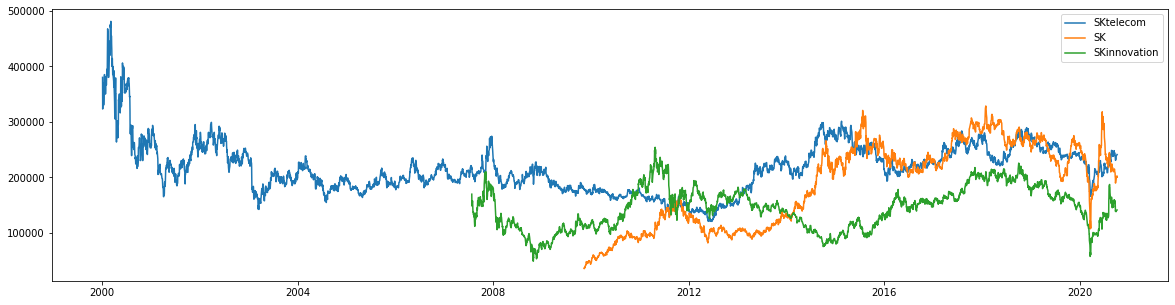

In [4]:
# SK그룹사(SKtelecom/SK/SKinnovation) 주가 비교
fig = plt.figure(figsize=(20,5))
plt.plot(skt_df['Close'], label='SKtelecom')
plt.plot(sk_df['Close'], label='SK')
plt.plot(skinno_df['Close'], label='SKinnovation')
plt.legend()
plt.show()

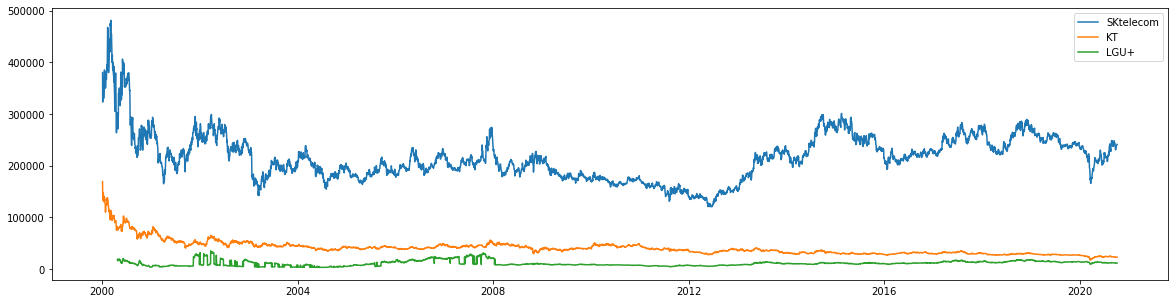

In [5]:
# 국내통신사 주가 비교(SKT vs KT vs LG U+)
fig = plt.figure(figsize=(20,5))
plt.plot(skt_df['Close'], label='SKtelecom')
plt.plot(kt_df['Close'], label='KT')
plt.plot(lgu_df['Close'], label='LGU+')
plt.legend()
plt.show()

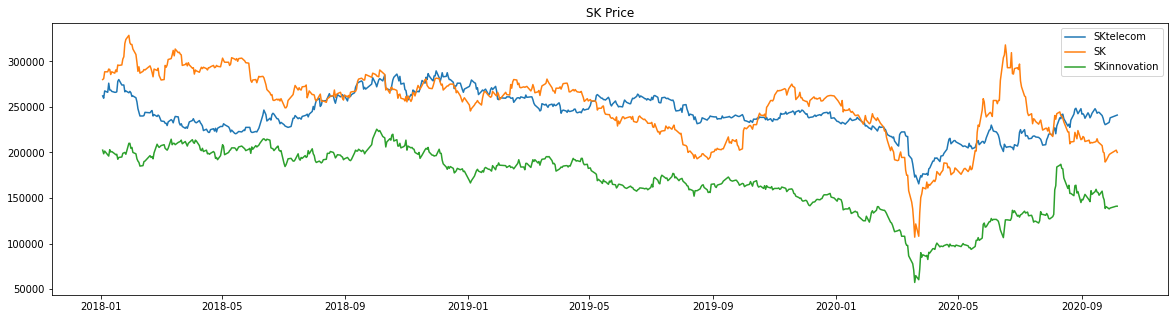

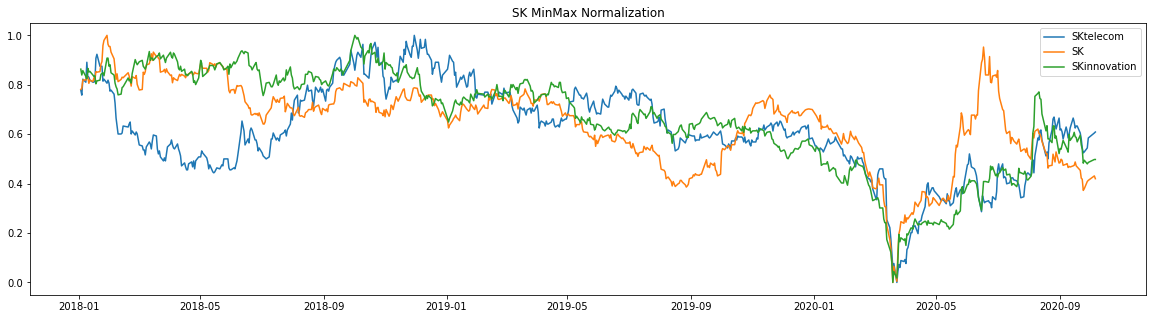

In [6]:
# SK그룹 주가 비교 (MinMax Normalization 활용한 비교)
starting_date='2018-01-01'

fig = plt.figure(figsize=(20,5))
plt.title("SK Price")
plt.plot(skt_df[skt_df.index>=starting_date]['Close'], label='SKtelecom')
plt.plot(sk_df[sk_df.index>=starting_date]['Close'], label='SK')
plt.plot(skinno_df[skinno_df.index>=starting_date]['Close'], label='SKinnovation')
plt.legend()
plt.show()

min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(skt_df[skt_df.index>=starting_date])
skt_output = min_max_scaler.transform(skt_df)
skt_minmax = pd.DataFrame(skt_output, columns=skt_df.columns, index=list(skt_df.index.values))

fitted = min_max_scaler.fit(sk_df[sk_df.index>=starting_date])
sk_output = min_max_scaler.transform(sk_df)
sk_minmax = pd.DataFrame(sk_output, columns=sk_df.columns, index=list(sk_df.index.values))

fitted = min_max_scaler.fit(skinno_df[skinno_df.index>=starting_date])
skinno_output = min_max_scaler.transform(skinno_df)
skinno_minmax = pd.DataFrame(skinno_output, columns=skinno_df.columns, index=list(skinno_df.index.values))

fig = plt.figure(figsize=(20,5))
plt.title("SK MinMax Normalization")
plt.plot(skt_minmax[skt_minmax.index>starting_date]['Close'], label='SKtelecom')
plt.plot(sk_minmax[sk_minmax.index>starting_date]['Close'], label='SK')
plt.plot(skinno_minmax[skinno_minmax.index>starting_date]['Close'], label='SKinnovation')
plt.legend()
plt.show()

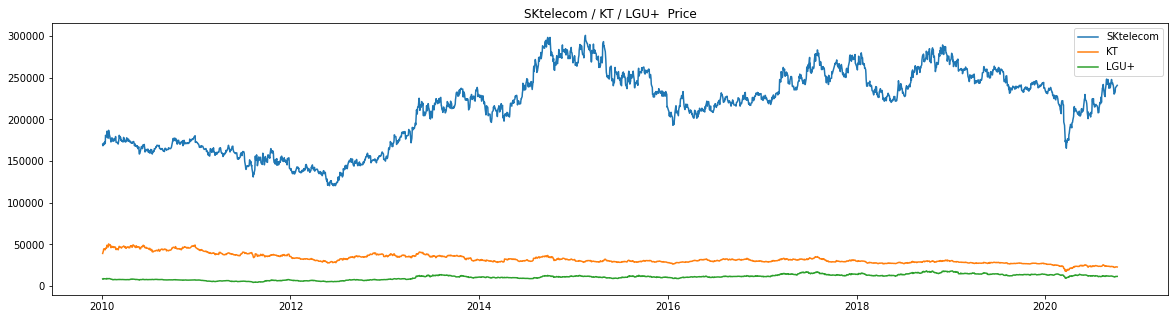

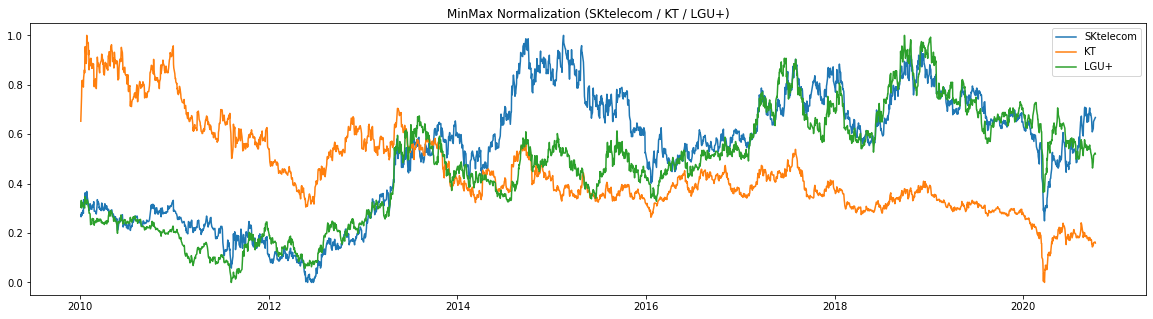

In [7]:
# 국내 통신 3사 주가 비교 (MinMax Normalization 활용한 비교)
starting_date='2010-01-01'

fig = plt.figure(figsize=(20,5))
plt.title("SKtelecom / KT / LGU+  Price")
plt.plot(skt_df[skt_df.index>starting_date]['Close'], label='SKtelecom')
plt.plot(kt_df[kt_df.index>starting_date]['Close'], label='KT')
plt.plot(lgu_df[lgu_df.index>starting_date]['Close'], label='LGU+')
plt.legend()
plt.show()

min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(skt_df[skt_df.index>=starting_date])
skt_output = min_max_scaler.transform(skt_df)
skt_minmax = pd.DataFrame(skt_output, columns=skt_df.columns, index=list(skt_df.index.values))

fitted = min_max_scaler.fit(kt_df[kt_df.index>=starting_date])
kt_output = min_max_scaler.transform(kt_df)
kt_minmax = pd.DataFrame(kt_output, columns=kt_df.columns, index=list(kt_df.index.values))

fitted = min_max_scaler.fit(lgu_df[lgu_df.index>=starting_date])
lgu_output = min_max_scaler.transform(lgu_df)
lgu_minmax = pd.DataFrame(lgu_output, columns=lgu_df.columns, index=list(lgu_df.index.values))

fig = plt.figure(figsize=(20,5))
plt.title("MinMax Normalization (SKtelecom / KT / LGU+)")
plt.plot(skt_minmax[skt_minmax.index>starting_date]['Close'], label='SKtelecom')
plt.plot(kt_minmax[kt_minmax.index>starting_date]['Close'], label='KT')
plt.plot(lgu_minmax[lgu_minmax.index>starting_date]['Close'], label='LGU+')
plt.legend()
plt.show()

In [8]:
idx=0

def CreateRow(company, start, end, value, comment):
  global idx
  
  d = pd.DataFrame()
  d.loc[idx, 'Company'] = company
  d.loc[idx, 'Date'] = "%s~%s" % (start, end)
  d.loc[idx, '분석기간'] = comment
  d.loc[idx, '평가지표'] = value
  idx = idx + 1
  return d

In [9]:
# MinMax Normalization 활용한 매도/매수 시점 확인하기
# 최근 1개월~12개월 확인(1개월 단위)
report_df = pd.DataFrame()
today = dt.datetime.now()

for cnt in range(1,12) :
  starting_date = today + relativedelta(months=-cnt)  
  
  min_max_scaler = MinMaxScaler()  
  fitted = min_max_scaler.fit(skt_df[skt_df.index>=starting_date])
  skt_output = min_max_scaler.transform(skt_df)
  skt_minmax = pd.DataFrame(skt_output, columns=skt_df.columns, index=list(skt_df.index.values))
  df = CreateRow("SKtelecom", starting_date.strftime("%Y-%m-%d"), today.strftime("%Y-%m-%d"), skt_minmax.tail(1)['Close'].values[0], "%d month ago" % cnt)
  report_df = report_df.append(df)

  fitted = min_max_scaler.fit(sk_df[sk_df.index>=starting_date])
  sk_output = min_max_scaler.transform(sk_df)
  sk_minmax = pd.DataFrame(sk_output, columns=sk_df.columns, index=list(sk_df.index.values))
  df = CreateRow("SK", starting_date.strftime("%Y-%m-%d"), today.strftime("%Y-%m-%d"), sk_minmax.tail(1)['Close'].values[0], "%d month ago" % cnt)
  report_df = report_df.append(df)

  fitted = min_max_scaler.fit(skinno_df[skinno_df.index>=starting_date])
  skinno_output = min_max_scaler.transform(skinno_df)
  skinno_minmax = pd.DataFrame(skinno_output, columns=skinno_df.columns, index=list(skinno_df.index.values))
  df = CreateRow("SKinnovation", starting_date.strftime("%Y-%m-%d"), today.strftime("%Y-%m-%d"), skinno_minmax.tail(1)['Close'].values[0], "%d month ago" % cnt)
  report_df = report_df.append(df)

In [10]:
# 최근 1년~10년 확인(1년 단위)
for cnt in range(1,10) :
  starting_date = today + relativedelta(years=-cnt)
  
  min_max_scaler = MinMaxScaler()  
  fitted = min_max_scaler.fit(skt_df[skt_df.index>=starting_date])
  skt_output = min_max_scaler.transform(skt_df)
  skt_minmax = pd.DataFrame(skt_output, columns=skt_df.columns, index=list(skt_df.index.values))
  df = CreateRow("SKtelecom", starting_date.strftime("%Y-%m-%d"), today.strftime("%Y-%m-%d"), skt_minmax.tail(1)['Close'].values[0], "%d years ago" % cnt)
  report_df = report_df.append(df)

  fitted = min_max_scaler.fit(sk_df[sk_df.index>=starting_date])
  sk_output = min_max_scaler.transform(sk_df)
  sk_minmax = pd.DataFrame(sk_output, columns=sk_df.columns, index=list(sk_df.index.values))
  df = CreateRow("SK", starting_date.strftime("%Y-%m-%d"), today.strftime("%Y-%m-%d"), sk_minmax.tail(1)['Close'].values[0], "%d years ago" % cnt)
  report_df = report_df.append(df)

  fitted = min_max_scaler.fit(skinno_df[skinno_df.index>=starting_date])
  skinno_output = min_max_scaler.transform(skinno_df)
  skinno_minmax = pd.DataFrame(skinno_output, columns=skinno_df.columns, index=list(skinno_df.index.values))
  df = CreateRow("SKinnovation", starting_date.strftime("%Y-%m-%d"), today.strftime("%Y-%m-%d"), skinno_minmax.tail(1)['Close'].values[0], "%d years ago" % cnt)
  report_df = report_df.append(df)

In [11]:
# 매도/매수 분석 적용
report_df.loc[ : , '비고']='-'
report_df.loc[ report_df['평가지표']>=0.8 , '비고']='매도 고려'
report_df.loc[ report_df['평가지표']>=0.9 , '비고']='적극 매도'
report_df.loc[ report_df['평가지표']<=0.2 , '비고']='매수 고려'
report_df.loc[ report_df['평가지표']<=0.1 , '비고']='적극 매수'

In [12]:
# 특정 회사
report_df[report_df['Company']=='SKtelecom'].sort_values(by=['평가지표'], ascending=False)
#report_df[report_df['Company']=='SKtelecom'].sort_values(by=['Date'], ascending=False)

,Company,Date,분석기간,평가지표,비고
30,SKtelecom,2019-11-06~2020-10-06,11 month ago,0.909639,적극 매도
33,SKtelecom,2019-10-06~2020-10-06,1 years ago,0.909639,적극 매도
18,SKtelecom,2020-03-06~2020-10-06,7 month ago,0.909639,적극 매도
21,SKtelecom,2020-02-06~2020-10-06,8 month ago,0.909639,적극 매도
24,SKtelecom,2020-01-06~2020-10-06,9 month ago,0.909639,적극 매도
27,SKtelecom,2019-12-06~2020-10-06,10 month ago,0.909639,적극 매도
15,SKtelecom,2020-04-06~2020-10-06,6 month ago,0.871795,매도 고려
9,SKtelecom,2020-06-06~2020-10-06,4 month ago,0.842105,매도 고려
12,SKtelecom,2020-05-06~2020-10-06,5 month ago,0.842105,매도 고려
6,SKtelecom,2020-07-06~2020-10-06,3 month ago,0.814815,매도 고려


In [13]:
# 특정 구간 보기
report_df[report_df['분석기간']=='3 years ago'].sort_values(by=['평가지표'], ascending=False)

,Company,Date,분석기간,평가지표,비고
39,SKtelecom,2017-10-06~2020-10-06,3 years ago,0.608871,-
41,SKinnovation,2017-10-06~2020-10-06,3 years ago,0.497622,-
40,SK,2017-10-06~2020-10-06,3 years ago,0.419865,-


In [14]:
# 특정 평가 지표
print("매도 평가")
print(report_df.sort_values(by=['평가지표'], ascending=False).head(10))
print("")
print("매수 평가")
print(report_df.sort_values(by=['평가지표'], ascending=True).head(10))

매도 평가
      Company                   Date          분석기간      평가지표     비고
30  SKtelecom  2019-11-06~2020-10-06  11 month ago  0.909639  적극 매도
33  SKtelecom  2019-10-06~2020-10-06   1 years ago  0.909639  적극 매도
21  SKtelecom  2020-02-06~2020-10-06   8 month ago  0.909639  적극 매도
18  SKtelecom  2020-03-06~2020-10-06   7 month ago  0.909639  적극 매도
27  SKtelecom  2019-12-06~2020-10-06  10 month ago  0.909639  적극 매도
24  SKtelecom  2020-01-06~2020-10-06   9 month ago  0.909639  적극 매도
15  SKtelecom  2020-04-06~2020-10-06   6 month ago  0.871795  매도 고려
9   SKtelecom  2020-06-06~2020-10-06   4 month ago  0.842105  매도 고려
12  SKtelecom  2020-05-06~2020-10-06   5 month ago  0.842105  매도 고려
6   SKtelecom  2020-07-06~2020-10-06   3 month ago  0.814815  매도 고려

매수 평가
         Company                   Date         분석기간      평가지표     비고
5   SKinnovation  2020-08-06~2020-10-06  2 month ago  0.061224  적극 매수
10            SK  2020-06-06~2020-10-06  4 month ago  0.081712  적극 매수
2   SKinnovation  2020-09-06~

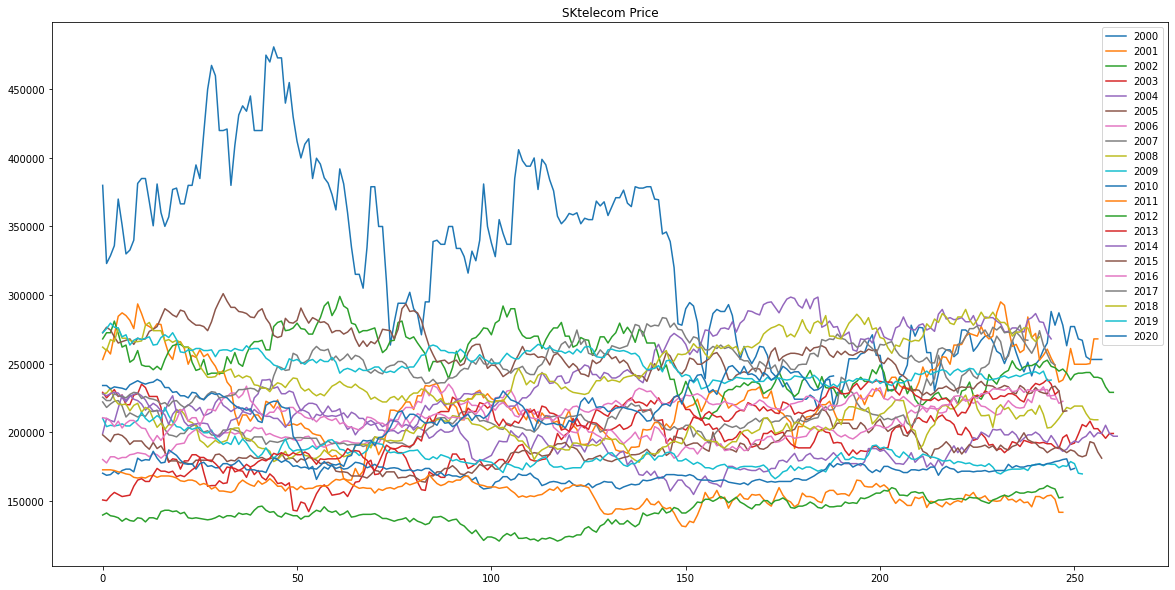

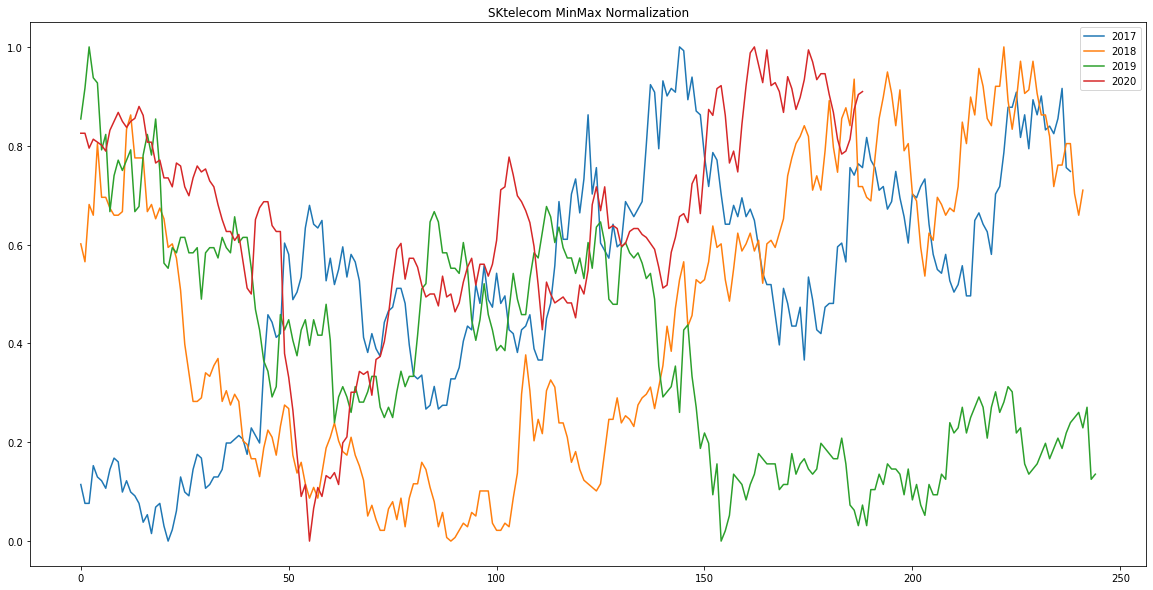

In [15]:
# SKT 년도별 변화 확인하기
start_year = skt_df.index[0].year
end_year = skt_df.index[-1].year

fig = plt.figure(figsize=(20,10))
plt.title("SKtelecom Price")
for i in range(start_year, end_year+1) :
  str_sdate = str(i)+"-01-01"
  str_edate = str(i+1)+"-01-01"
  df = skt_df[ (skt_df.index>=str_sdate) & (skt_df.index<str_edate)]['Close']
  df.reset_index(drop=True, inplace=True)
  plt.plot(df.index, df.values, label=str(i))
plt.legend()
plt.show()

start_year = 2017
end_year = skt_df.index[-1].year

min_max_scaler = MinMaxScaler()
fig = plt.figure(figsize=(20,10))
plt.title("SKtelecom MinMax Normalization")
for i in range(start_year, end_year+1) :
  str_sdate = str(i)+"-01-01"
  str_edate = str(i+1)+"-01-01"

  fitted = min_max_scaler.fit(skt_df[ (skt_df.index>=str_sdate) & (skt_df.index<str_edate) ])
  skt_output = min_max_scaler.transform(skt_df)
  skt_minmax = pd.DataFrame(skt_output, columns=skt_df.columns, index=list(skt_df.index.values))
  
  df = skt_minmax[ (skt_minmax.index>=str_sdate) & (skt_minmax.index<str_edate)]['Close']
  df.reset_index(drop=True, inplace=True)
  plt.plot(df.index, df.values, label=str(i))
plt.legend()
plt.show()